CALORIES BURNED CALCULATOR

In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.shape

(15000, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   User_ID     15000 non-null  int64  
 2   Gender      15000 non-null  int64  
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
 9   Calories    15000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.1 MB


In [18]:

df.describe()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,4330.271354,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,3749.750000,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,7499.500000,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,11249.250000,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,14999.000000,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
df.isnull().sum()

Unnamed: 0    0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<ipython-input-27-32e6ae40b245>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i + 1)


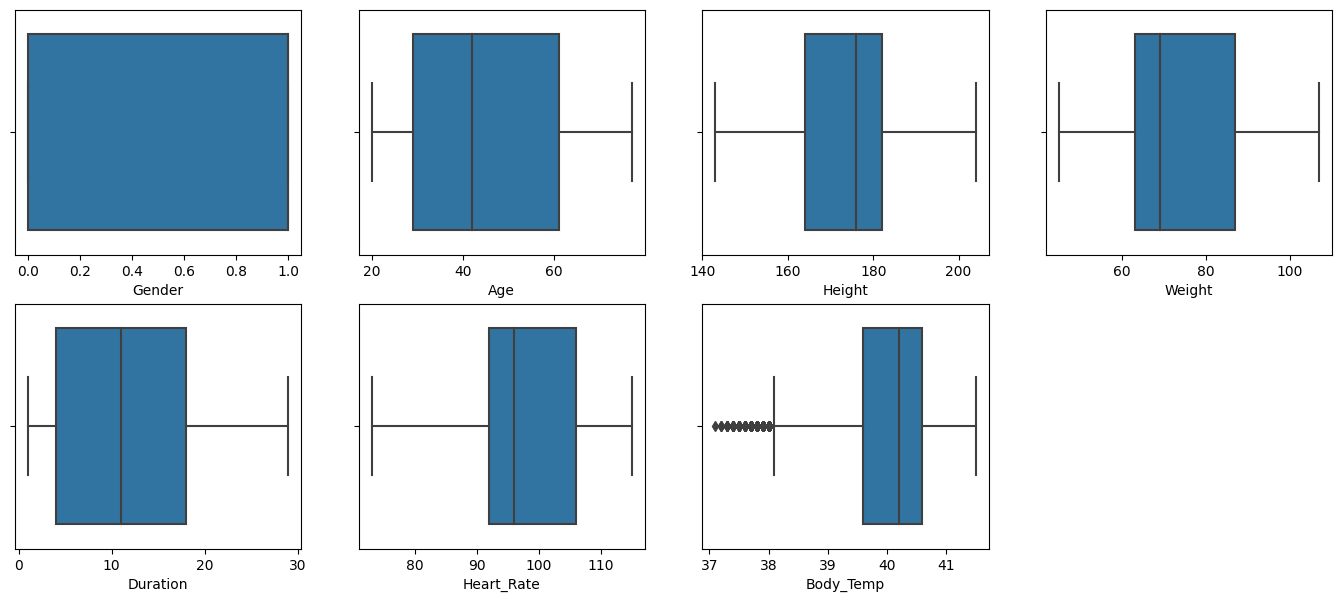

In [27]:
#check for outliers
features = ['Gender', 'Age', 'Height','Weight','Duration','Heart_Rate', 'Body_Temp']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sb.boxplot(df[col], x=df[col])

plt.show()

In [32]:

#adjust the outliers

df = df[df['Body_Temp']<40]
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


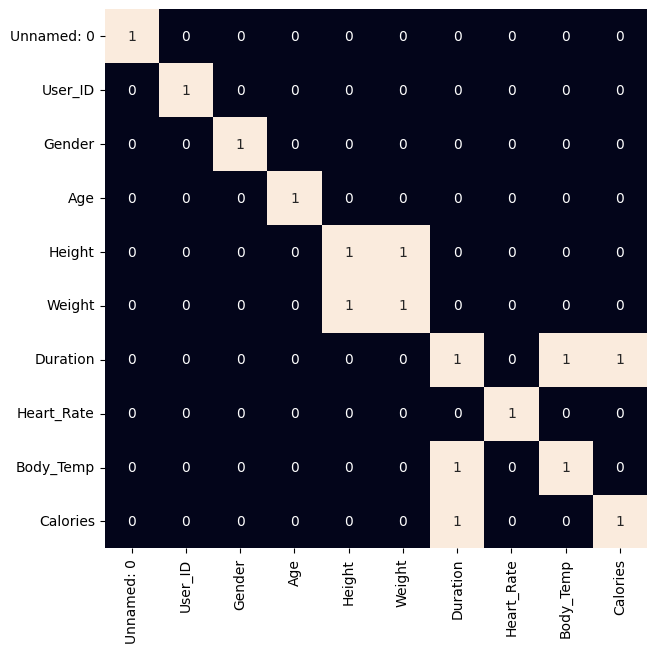

In [33]:

#use heatmap to see highly correlated variables
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [7]:
X=df.drop(['User_ID', 'Calories'],axis=1)

In [8]:
y = df['Calories']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
#fit the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_test)

#find the performance of various models
models = [LinearRegression(), XGBRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(),
          Lasso(), Ridge()]

for i in range(6):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(y_train, pred_train))

    pred_val = models[i].predict(X_val)
    print('Validation Error : ', mape(y_test, pred_val))
    print()


LinearRegression() : 
Training Error :  0.2929346205079751
Validation Error :  0.29713313284247655

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  0.01857796900713994
Validation Error :  0.028233191119444563

RandomForestRegressor() : 
Training Error :  0.011073695174216032
Validation

The best value reaches RandomForestRegressor

In [10]:
model = RandomForestRegressor()

In [11]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
y_pred=model.predict(X_test)

In [29]:
r2_score(y_test,y_pred)

0.997810452942206

In [30]:
y_pred = model.predict(X_test)

In [14]:
import pickle

In [31]:
pickle.dump(model,open('model.pkl','wb'))